## Project: Topic Classification

In [ ]:
!pip install simpletransformers==0.65.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.6/312.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.9/264.9 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
test = pd.read_csv("/content/sentiment-topic-test.tsv", sep="\t").drop(['sentence id', 'sentiment'],axis = 1).rename(columns={"topic":"labels"})
le = sklearn.preprocessing.LabelEncoder()
le.fit(test["labels"])
test["labels"] = le.transform(test["labels"])

In [ ]:
test

,text,labels
0,I wouldn't be caught dead watching the NFL if ...,2
1,Chris O'Donnell stated that while filming for ...,1
2,"The whole game was a rollercoaster ride, but L...",2
3,"Zendaya slayed in Dune 2, as she does in all h...",1
4,While my favorite player was playing this matc...,2
5,My uncle's brother's neighbor's cat's veterina...,0
6,He said that The Great Gatsby is the best nove...,0
7,I could not look away from this train wrck of ...,1
8,The film Everything Everywhere All At Once fol...,1
9,I just finished reading pride and prejudice wh...,0


https://www.kaggle.com/datasets/shrutimehta/amazon-book-reviews-webscraped/data?select=Reviews.csv

In [ ]:
book_reviews = pd.read_csv("/content/book_reviews.csv",encoding='cp1252')

In [ ]:
book_reviews

,ReviewContent
0,Good. It IS a page turner. You can read this b...
1,There are no words for how much I loathed this...
2,I think I would ordinarily cut this book more ...
3,Three disjointed characters for whom it's hard...
4,Was snookered into this novel as it was compar...
...,...
4995,The story is told through the inner experience...
4996,I cannot wait for Ms. Hawkins next book. I am ...
4997,"As I read this book, I could already see the m..."
4998,I can't really see why this is a best seller. ...


In [ ]:
book = pd.DataFrame(book_reviews["ReviewContent"]).rename(columns={"ReviewContent":"text"})
book_label = pd.DataFrame(["book" for i in range(len(book))]).rename(columns={0:"labels"})
book = pd.concat([book,book_label],axis = 1)
book

,text,labels
0,Good. It IS a page turner. You can read this b...,book
1,There are no words for how much I loathed this...,book
2,I think I would ordinarily cut this book more ...,book
3,Three disjointed characters for whom it's hard...,book
4,Was snookered into this novel as it was compar...,book
...,...,...
4995,The story is told through the inner experience...,book
4996,I cannot wait for Ms. Hawkins next book. I am ...,book
4997,"As I read this book, I could already see the m...",book
4998,I can't really see why this is a best seller. ...,book


https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data

In [ ]:
movie_reviews = pd.read_csv("/content/movie_reviews.csv")

In [ ]:
movie_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
movie = pd.DataFrame(movie_reviews["review"]).rename(columns={"review":"text"})
movie_label = pd.DataFrame(["movie" for i in range(len(movie))]).rename(columns={0:"labels"})
movie = pd.concat([movie,movie_label],axis = 1)
movie, _ = train_test_split(movie, test_size=0.9, random_state=0)
movie

,text,labels
43726,"I really tried to like ""Saw."" The story was go...",movie
16118,A 2006 online poll of Japan's top 100 favorite...,movie
49381,Tony Goldwyn is a good actor who evidently is ...,movie
35715,A beautifully constructed and brilliantly acte...,movie
14489,John Landis truly outdid himself when he direc...,movie
...,...,...
21243,I did not set very high expectations for this ...,movie
45891,"THE BLOB is a great horror movie, not merely b...",movie
42613,"After too many years of waiting, Anne Rivers S...",movie
43567,I am a massive fan of the LoG. I thought the f...,movie


https://www.kaggle.com/datasets/shivamtaneja2304/google-news-sports

In [ ]:
google_news = pd.read_csv("/content/news_dataset.csv")

In [ ]:
google_news

,Headline,Sport,Date
0,Live Cricket Scores | Cricket Live Score ball ...,Cricket,2023-09-15
1,QAT vs BAH Dream11 Prediction Today Match 2 Gu...,Cricket,2023-09-15
2,"Meet Shubman Gill’s father Lakhwinder Singh, c...",Cricket,2023-09-15
3,Cricket World Live InPlay,Cricket,2023-09-15
4,"RGD vs CAS Dream11 Prediction, Fantasy Cricket...",Cricket,2023-09-15
...,...,...,...
148138,"Archery World Cup 2023 season: Preview, schedu...",Archery,2023-11-26
148139,"Menjajal Olahraga Panahan di Bali, Rekreasi Sa...",Archery,2023-11-26
148140,International-level archery academy in Maharas...,Archery,2023-11-26
148141,Four cities apply to host 2027 World Archery C...,Archery,2023-11-26


https://www.kaggle.com/datasets/sunilthite/text-document-classification-dataset

In [ ]:
df_classification = pd.read_csv("/content/df_file.csv")

In [ ]:
df_classification[df_classification['Label']==1]

,Text,Label
417,Hodges announces rugby retirement\n \n Scarlet...,1
418,Bomb threat at Bernabeu stadium\n \n Spectator...,1
419,Parmar ruled out of Davis Cup tie\n \n A knee ...,1
420,Benitez issues warning to Gerrard\n \n Liverpo...,1
421,Officials respond in court row\n \n Australian...,1
...,...,...
923,Ireland 21-19 Argentina\n \n An injury-time dr...,1
924,Redknapp's Saints face Pompey tie\n \n New Sou...,1
925,Poll explains free-kick decision\n \n Referee ...,1
926,IAAF launches fight against drugs\n \n The IAA...,1


https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive

In [ ]:
bbc_news = pd.read_csv("/content/bbc-news-data.csv", sep="\t")

In [ ]:
bbc_news[bbc_news['category']=="sport"]

,category,filename,title,content
1313,sport,001.txt,Claxton hunting first major medal,British hurdler Sarah Claxton is confident sh...
1314,sport,002.txt,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she would...
1315,sport,003.txt,Greene sets sights on world title,Maurice Greene aims to wipe out the pain of l...
1316,sport,004.txt,IAAF launches fight against drugs,The IAAF - athletics' world governing body - ...
1317,sport,005.txt,"Dibaba breaks 5,000m world record",Ethiopia's Tirunesh Dibaba set a new world re...
...,...,...,...,...
1819,sport,507.txt,Big guns ease through in San Jose,Top-seeded Americans Andy Roddick and Andre A...
1820,sport,508.txt,Almagro continues Spanish surge,Unseeded Nicolas Almagro became the fifth Spa...
1821,sport,509.txt,Melzer shocks Agassi in San Jose,Second seed Andre Agassi suffered a comprehen...
1822,sport,510.txt,Mirza makes Indian tennis history,Teenager Sania Mirza completed a superb week ...


In [ ]:
sports1 = pd.DataFrame(google_news["Headline"]).rename(columns={"Headline":"text"})
sports1 = sports1.sample(3978,random_state=2)
sports2 = pd.DataFrame(df_classification[df_classification['Label']==1]["Text"]).rename(columns={"Text":"text"})
sports3 = pd.DataFrame(bbc_news[bbc_news['category']=="sport"]["content"]).rename(columns={"content":"text"})
sports = pd.concat([sports1,sports2,sports3])
sports_label = pd.DataFrame(["sports" for i in range(len(sports))]).rename(columns={0:"labels"})
sports.reset_index(inplace=True)
sports = pd.concat([sports,sports_label],axis = 1)
sports

,index,text,labels
0,104560,Watch Sterling Spencer's Totally Weird But Gre...,sports
1,61553,Archery-only mule deer hunt coming up in Roundup,sports
2,126124,"UFC 295, Live Streaming: When And Where To Wat...",sports
3,14480,College volleyball: Mountaineers sweep rival Y...,sports
4,141970,BYU Gymnastics Announces Three Signees,sports
...,...,...,...
4995,1819,Top-seeded Americans Andy Roddick and Andre A...,sports
4996,1820,Unseeded Nicolas Almagro became the fifth Spa...,sports
4997,1821,Second seed Andre Agassi suffered a comprehen...,sports
4998,1822,Teenager Sania Mirza completed a superb week ...,sports


In [ ]:
train = pd.concat([book,movie,sports])
train["labels"] = le.transform(train["labels"])
train, dev = train_test_split(train, test_size=0.1, random_state=0,
                               stratify=train[['labels']])
train

,text,labels,index
2929,Kelly Clark: A Trailblazer in Snowboarding,2,78926.0
3764,"Hawkins's writing is kind of amateurish, but t...",0,NaN
2024,ITA Men's All-American Championships - ITA #We...,2,66958.0
4430,O'Sullivan keeps his powder dry\n \n When you ...,2,869.0
2704,"I enjoyed this book, though I wish the charact...",0,NaN
...,...,...,...
403,I found the character of Rachel to be quite en...,0,NaN
23195,This movie is definately one of my favorite mo...,1,NaN
4857,Lets just say I was pretty sure I knew what wa...,0,NaN
3203,Loved the idea of imagining what people are li...,0,NaN


In [ ]:
# Define model configuration for XLNet
model_args_xlnet = ClassificationArgs()

model_args_xlnet.overwrite_output_dir = True  # Overwrite existing saved models in the same directory
model_args_xlnet.evaluate_during_training = True  # Perform evaluation while training the model

model_args_xlnet.num_train_epochs = 10  # Number of epochs
model_args_xlnet.train_batch_size = 45  # Batch size
model_args_xlnet.learning_rate = 4e-6  # Learning rate
model_args_xlnet.max_seq_length = 256  # Maximum sequence length

model_args_xlnet.use_early_stopping = True  # Early stopping to combat overfitting
model_args_xlnet.early_stopping_delta = 0.01  # Improvement over best_eval_loss necessary to count as a better checkpoint
model_args_xlnet.early_stopping_metric = 'eval_loss'
model_args_xlnet.early_stopping_metric_minimize = True
model_args_xlnet.early_stopping_patience = 2
model_args_xlnet.evaluate_during_training_steps = 100  # How often to run validation in terms of training steps (or batches)




In [ ]:
# # Checking steps per epoch
steps_per_epoch = int(np.ceil(len(train) / float(model_args_xlnet.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch)) # 50 steps = validating 2 times per epoch



Each epoch will have 300 steps.


In [ ]:
model = ClassificationModel('xlnet', 'xlnet-base-cased', num_labels=4, args=model_args_xlnet, use_cuda=True) # CUDA is enabled

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

In [ ]:
_, history = model.train_model(train, eval_df=dev)

  0%|          | 0/27 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

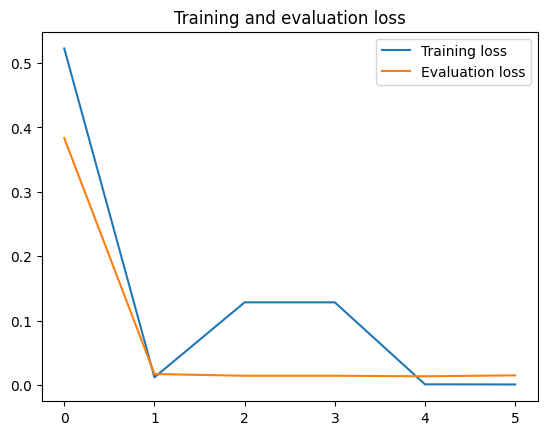

In [ ]:
# Training and evaluation loss
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss')
plt.legend()

In [ ]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(dev)
result

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/15 [00:00<?, ?it/s]

{'mcc': 0.99500199000597, 'eval_loss': 0.015238364236817384}

In [ ]:
predicted, probabilities = model.predict(test.text.to_list())
test['predicted'] = predicted

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
test.head(5)

,text,labels,predicted
0,I wouldn't be caught dead watching the NFL if ...,2,1
1,Chris O'Donnell stated that while filming for ...,1,1
2,"The whole game was a rollercoaster ride, but L...",2,2
3,"Zendaya slayed in Dune 2, as she does in all h...",1,2
4,While my favorite player was playing this matc...,2,2


In [ ]:
# Result (note: your result can be different due to randomness in operations)
print(classification_report(test['labels'], test['predicted']))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      0.75      0.75         4
           2       0.50      0.67      0.57         3

    accuracy                           0.70        10
   macro avg       0.75      0.69      0.71        10
weighted avg       0.75      0.70      0.71        10



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# We'll use bag-of-words representation
vectorizer = CountVectorizer()

# rain a Naive Bayes classifier
nb_classifier = MultinomialNB()
X_train = vectorizer.fit_transform(train['text'])
nb_classifier.fit(X_train, train['labels'])

# Transform the development set
X_dev = vectorizer.transform(dev['text'])

# Making predictions on the development set
dev_predictions_nb = nb_classifier.predict(X_dev)

# Evaluate the classifier
accuracy_nb = accuracy_score(dev['labels'], dev_predictions_nb)

print("Naive Bayes Classifier Accuracy:", accuracy_nb)

X_test = vectorizer.transform(test['text'])
test_predictions_nb = nb_classifier.predict(X_test)
print(classification_report(test['labels'], test_predictions_nb))

Naive Bayes Classifier Accuracy: 0.978
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.75      0.60         4
           2       1.00      0.67      0.80         3

    accuracy                           0.60        10
   macro avg       0.67      0.58      0.60        10
weighted avg       0.65      0.60      0.60        10



In [ ]:
test["predicted_nb"] = test_predictions_nb
test

,text,labels,predicted,predicted_nb
0,I wouldn't be caught dead watching the NFL if ...,2,1,1
1,Chris O'Donnell stated that while filming for ...,1,1,1
2,"The whole game was a rollercoaster ride, but L...",2,2,2
3,"Zendaya slayed in Dune 2, as she does in all h...",1,2,1
4,While my favorite player was playing this matc...,2,2,2
5,My uncle's brother's neighbor's cat's veterina...,0,2,1
6,He said that The Great Gatsby is the best nove...,0,0,1
7,I could not look away from this train wrck of ...,1,1,0
8,The film Everything Everywhere All At Once fol...,1,1,1
9,I just finished reading pride and prejudice wh...,0,0,0
